In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [496]:
df = pd.read_csv('../data/student_data.csv')
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [497]:
schema = df.dtypes
pd.DataFrame(schema, columns=['Type']).to_csv("..\schema\dataframe_schema.csv")
pd.DataFrame(schema, columns=['Type'])

,Type
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [498]:
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 395 rows and 33 columns.


In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [500]:
df.school.unique()

array(['GP', 'MS'], dtype=object)

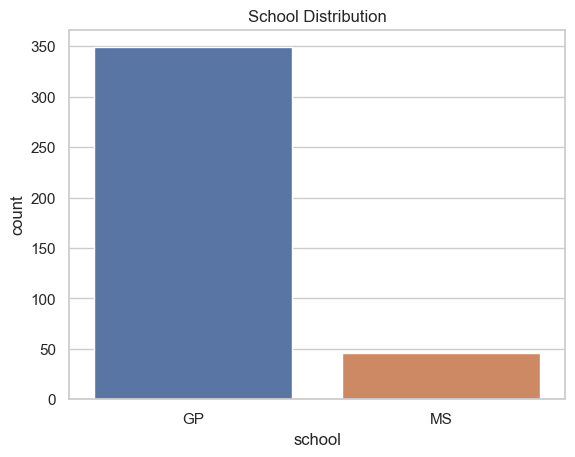

In [501]:
sns.countplot(x='school', data=df)
plt.title('School Distribution')
plt.savefig('../Images/school.png')
plt.show()

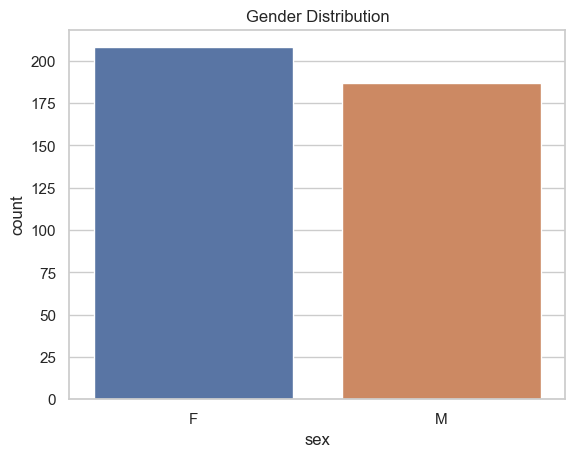

In [502]:
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution")
plt.savefig('../Images/gender.png')
plt.show()

In [503]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [504]:
male_per = (df.sex.value_counts()['M']/df.sex.count()) * 100
female_per = (df.sex.value_counts()['F']/df.sex.count()) * 100

print(f"The percentage of female students is {male_per} and the percentage of male students is {female_per}")

The percentage of female students is 47.34177215189874 and the percentage of male students is 52.65822784810127


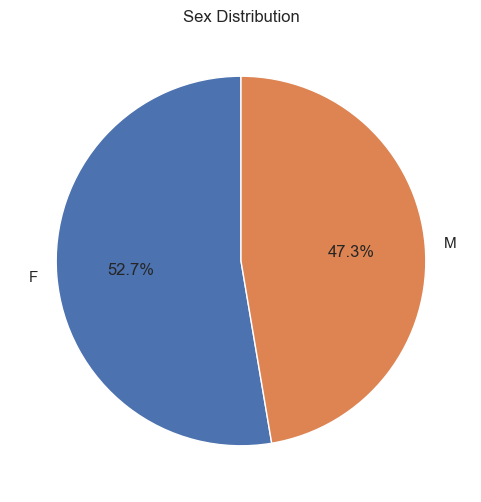

In [505]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df.sex.value_counts(), labels=df.sex.unique(), autopct='%1.1f%%', startangle=90)
plt.title('Sex Distribution')
plt.savefig('../Images/sex_distribution.png')
plt.show()

In [506]:
pd.DataFrame(df.age.describe())

,age
count,395.000000
mean,16.696203
std,1.276043
min,15.000000
25%,16.000000
50%,17.000000
75%,18.000000
max,22.000000


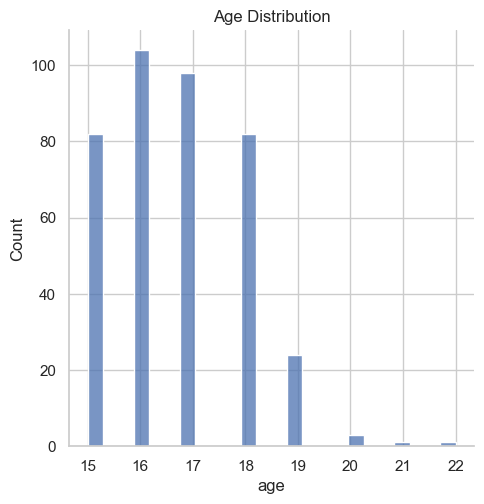

In [507]:
sns.displot(df.age, bins=24)
plt.title("Age Distribution")
plt.savefig('../Images/age_distribution.png')
plt.show()

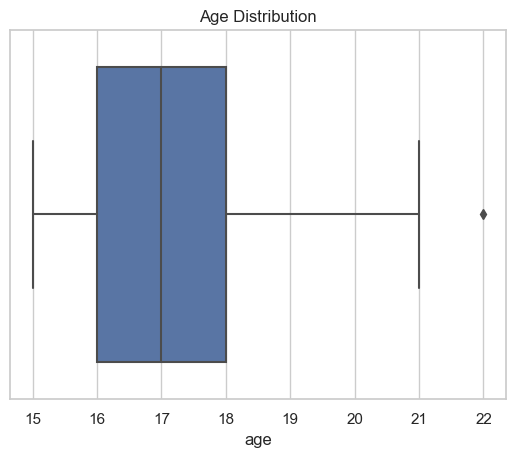

In [508]:
sns.boxplot(x='age', data=df)  
plt.title("Age Distribution")
plt.show()

In [509]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['age'] >= Q1 - 1.5*IQR) & (df['age'] <= Q3 + 1.5*IQR)]

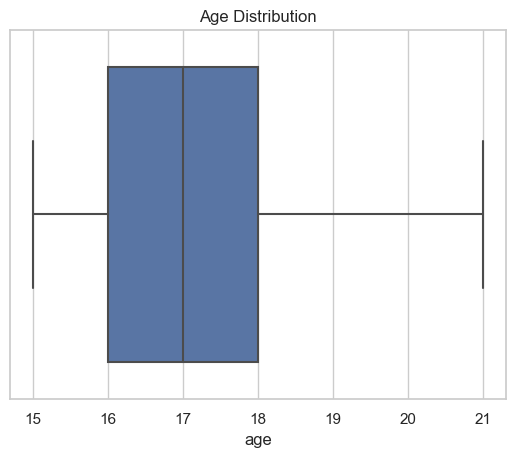

In [510]:
sns.boxplot(x='age', data=df)  
plt.title("Age Distribution")
plt.show()

In [511]:
df.address.value_counts()

U    306
R     88
Name: address, dtype: int64

### student's home address type (binary: 'U' - urban or 'R' - rural)

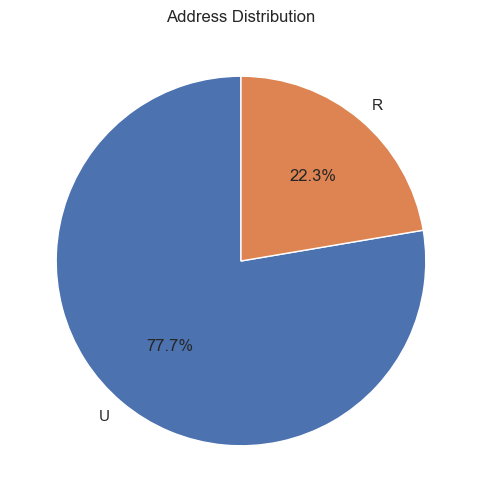

In [512]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df.address.value_counts(), labels=df.address.unique(), autopct='%1.1f%%', startangle=90)
plt.title('Address Distribution')
plt.savefig('../Images/address_distribution.png')
plt.show()

In [513]:
df.famsize.value_counts()

GT3    280
LE3    114
Name: famsize, dtype: int64

### Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

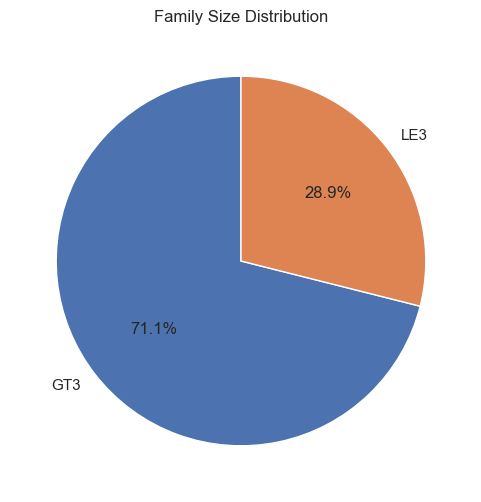

In [514]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df.famsize.value_counts(), labels=df.famsize.unique(), autopct='%1.1f%%', startangle=90)
plt.title('Family Size Distribution')
plt.savefig('../Images/family_size_distribution.png')
plt.show()

In [515]:
df.Pstatus.value_counts()

T    353
A     41
Name: Pstatus, dtype: int64

### Parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

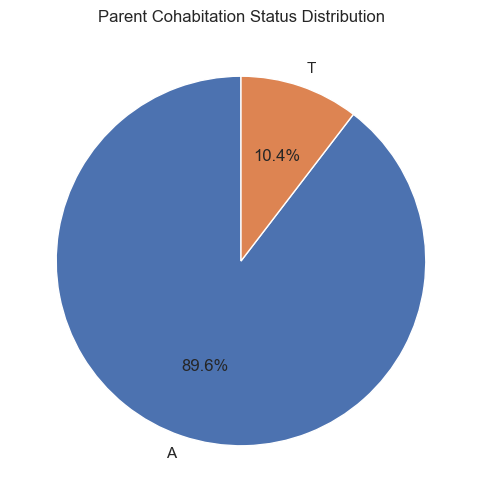

In [516]:
sns.set(style="whitegrid")  
plt.figure(figsize=(6,6))
plt.pie(df.Pstatus.value_counts(), labels=df.Pstatus.unique(), autopct='%1.1f%%', startangle=90)
plt.title('Parent Cohabitation Status Distribution')
plt.savefig('../Images/parent_cohabitation_status_distribution.png')
plt.show()

### Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary)

In [517]:
df.Medu.value_counts()

4    131
2    103
3     98
1     59
0      3
Name: Medu, dtype: int64

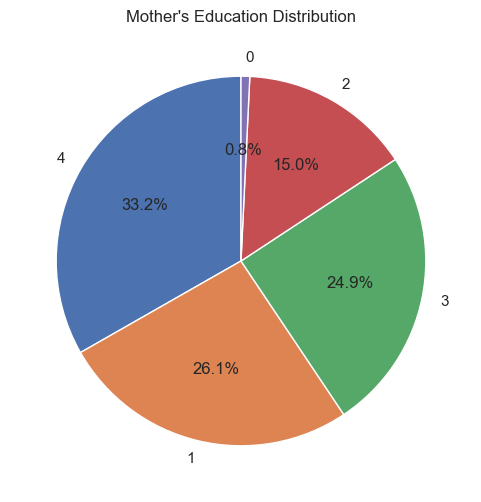

In [518]:
sns.set(style="whitegrid")  
plt.figure(figsize=(6,6))
plt.pie(df.Medu.value_counts(), labels=df.Medu.unique(), autopct='%1.1f%%', startangle=90)
plt.title('Mother\'s Education Distribution')
plt.savefig('../Images/mother_education_distribution.png')
plt.show()

### Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary)

In [519]:
df.Fedu.value_counts()

2    115
3    100
4     96
1     81
0      2
Name: Fedu, dtype: int64

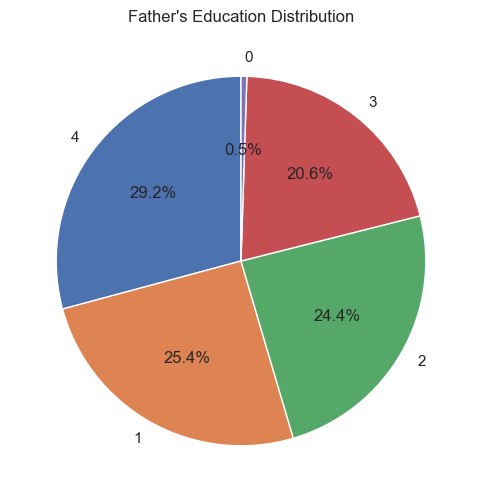

In [520]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df.Fedu.value_counts(), labels=df.Fedu.unique(), autopct='%1.1f%%', startangle=90)
plt.title('Father\'s Education Distribution')
plt.savefig('../Images/father_education_distribution.png')
plt.show()

### Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other

In [521]:
df.Mjob.unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [522]:
df.value_counts('Mjob')

Mjob
other       141
services    102
at_home      59
teacher      58
health       34
dtype: int64

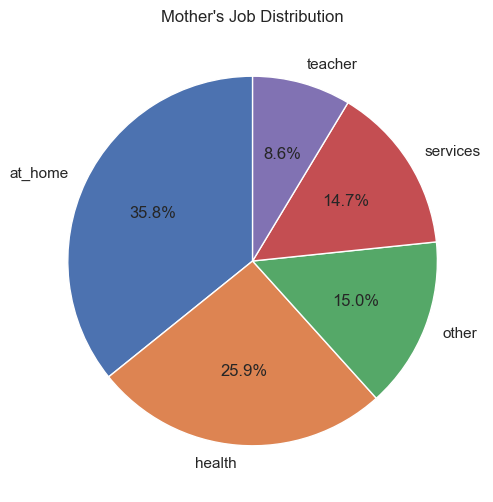

In [523]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df.Mjob.value_counts(), labels=df.Mjob.unique(), autopct='%1.1f%%', startangle=90)
plt.title('Mother\'s Job Distribution')
plt.savefig('../Images/mother_job_distribution.png')
plt.show()

In [524]:
# Converting the Occupation Details to numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Mjob'] = le.fit_transform(df['Mjob'])
df['Mjob'].unique()

array([0, 1, 2, 3, 4])

In [525]:
df.value_counts('Fjob')

Fjob
other       217
services    110
teacher      29
at_home      20
health       18
dtype: int64

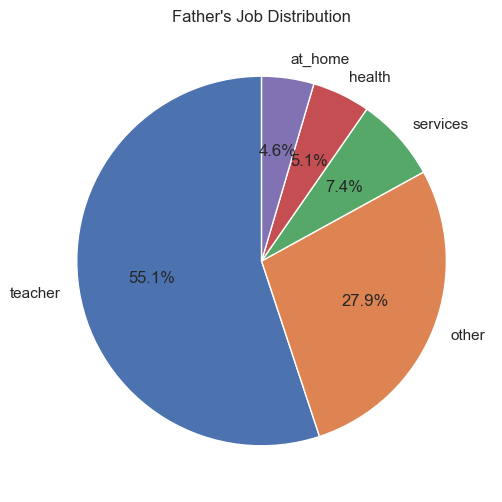

In [526]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df.Fjob.value_counts(), labels=df.Fjob.unique(), autopct='%1.1f%%', startangle=90)
plt.title('Father\'s Job Distribution')
plt.savefig('../Images/father_job_distribution.png')
plt.show()

In [527]:
from sklearn.preprocessing import LabelEncoder

# iterate over all columns
for col in df.columns:
    # check if the column is of object type
    if df[col].dtype == 'object':
        # create a LabelEncoder object
        le = LabelEncoder()
        # fit and transform the column
        df[col] = le.fit_transform(df[col])


In [528]:
df.reason.unique()

array([0, 2, 1, 3])

### reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

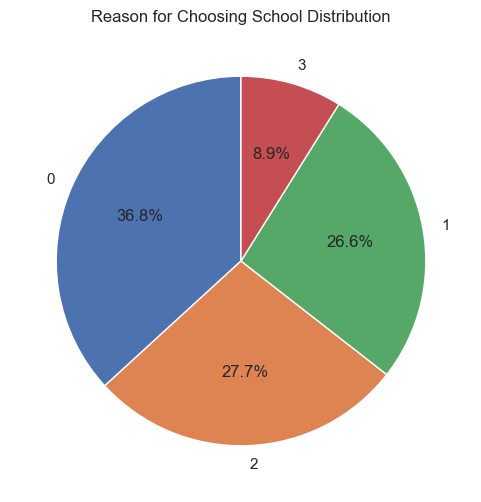

In [529]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df.reason.value_counts(), labels=df.reason.unique(), autopct='%1.1f%%', startangle=90)
plt.title('Reason for Choosing School Distribution')
plt.savefig('../Images/reason_for_choosing_school_distribution.png')
plt.show()

In [530]:
df.traveltime.value_counts()

1    256
2    107
3     23
4      8
Name: traveltime, dtype: int64

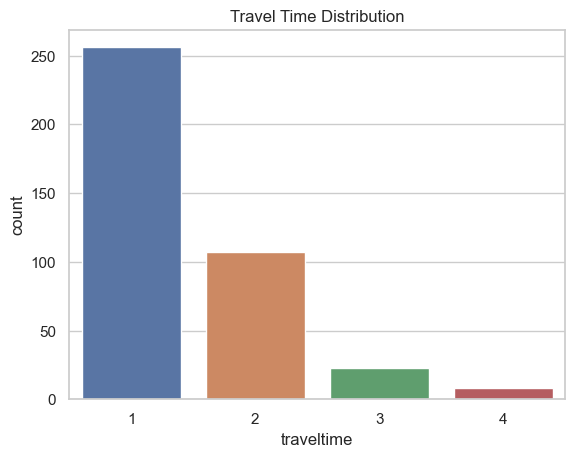

In [531]:
sns.countplot(x='traveltime', data=df)
plt.title('Travel Time Distribution')
plt.savefig('../Images/travel_time_distribution.png')
plt.show()

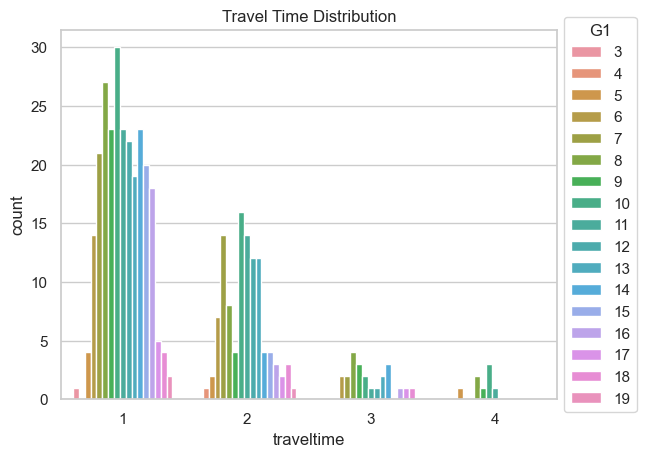

In [532]:
sns.countplot(x='traveltime', data=df, hue='G1')
plt.figsize=(20,20)
plt.title('Travel Time Distribution')
plt.legend(title='G1', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('../Images/travel_time_distribution.png', bbox_inches='tight')
plt.show()


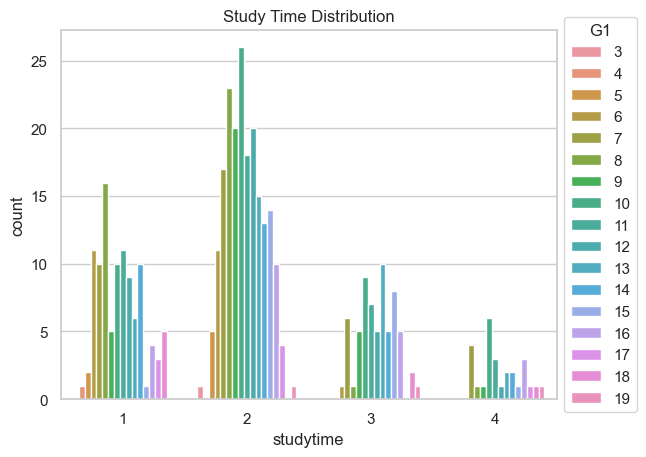

In [533]:
sns.countplot(x='studytime', data=df, hue='G1')
plt.figsize=(20,20)
plt.title('Study Time Distribution')
plt.legend(title='G1', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('../Images/study_time_distribution.png', bbox_inches='tight')
plt.show()

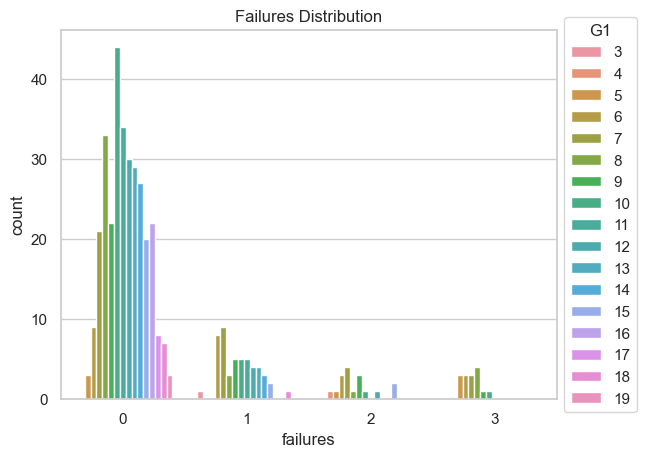

In [534]:
sns.countplot(x='failures', data=df, hue='G1')
plt.figsize=(20,20)
plt.title('Failures Distribution')
plt.legend(title='G1', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('../Images/failures_distribution.png', bbox_inches='tight')
plt.show()

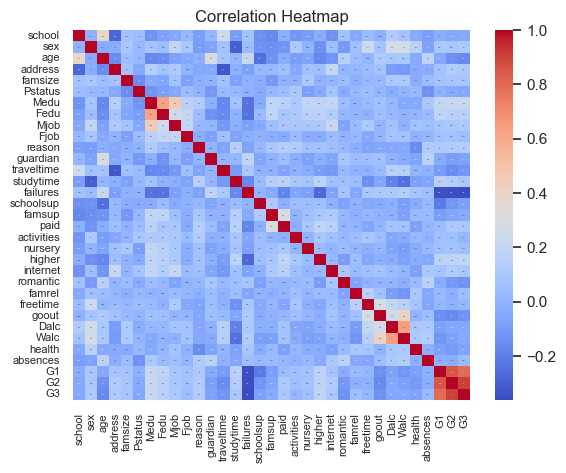

<Figure size 2000x2000 with 0 Axes>

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.011332,0.390181,-0.279452,0.064323,0.046251,-0.133153,-0.081313,-0.056088,0.019763,...,-0.046930,0.033725,-0.005607,0.120286,0.067419,-0.044545,-0.087493,-0.027176,-0.050793,-0.045527
sex,-0.011332,1.000000,-0.040707,-0.029991,0.091744,0.022567,0.077729,0.038777,0.189986,0.082916,...,0.055993,0.237204,0.071709,0.263227,0.270463,0.149365,-0.070657,0.096207,0.093227,0.105054
age,0.390181,-0.040707,1.000000,-0.155898,0.045612,0.026598,-0.169866,-0.152409,-0.078037,-0.045037,...,0.042506,0.008535,0.111887,0.093243,0.097743,-0.043917,0.165653,-0.049680,-0.139023,-0.159607
address,-0.279452,-0.029991,-0.155898,1.000000,0.073402,-0.043056,0.138552,0.074293,0.107999,-0.003048,...,0.012683,0.033874,0.066793,-0.100930,-0.104616,-0.038033,-0.029697,0.071943,0.127149,0.106550
famsize,0.064323,0.091744,0.045612,0.073402,1.000000,-0.149160,-0.042722,-0.061327,0.072561,-0.083216,...,-0.020918,0.018958,0.025923,0.110182,0.107491,-0.032120,0.037963,0.069280,0.080149,0.080624
Pstatus,0.046251,0.022567,0.026598,-0.043056,-0.149160,1.000000,-0.123789,-0.087752,-0.055101,0.033207,...,0.024207,0.038089,0.001997,-0.034708,0.004250,0.024003,-0.136356,-0.015635,-0.040791,-0.057582
Medu,-0.133153,0.077729,-0.169866,0.138552,-0.042722,-0.123789,1.000000,0.625870,0.454707,0.157585,...,-0.004609,0.030470,0.063342,0.017893,-0.048626,-0.046009,0.099752,0.206793,0.216105,0.217546
Fedu,-0.081313,0.038777,-0.152409,0.074293,-0.061327,-0.087752,0.625870,1.000000,0.246491,0.203818,...,0.002831,-0.010155,0.049453,0.016820,-0.005190,0.008261,0.029182,0.185988,0.162840,0.151011
Mjob,-0.056088,0.189986,-0.078037,0.107999,0.072561,-0.055101,0.454707,0.246491,1.000000,0.195612,...,0.036643,0.113153,0.000246,0.070734,-0.015770,0.068719,0.048170,0.084504,0.098755,0.103086
Fjob,0.019763,0.082916,-0.045037,-0.003048,-0.083216,0.033207,0.157585,0.203818,0.195612,1.000000,...,0.011244,-0.049176,0.006772,0.071013,0.065998,-0.014239,0.005488,0.061017,0.068641,0.043456


In [535]:

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={"fontsize":1}, xticklabels=df.columns, yticklabels=df.columns)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.title("Correlation Heatmap")
plt.figure(figsize=(20,20))
plt.show()
df.corr()

In [536]:
df.corr()['G3']

school       -0.045527
sex           0.105054
age          -0.159607
address       0.106550
famsize       0.080624
Pstatus      -0.057582
Medu          0.217546
Fedu          0.151011
Mjob          0.103086
Fjob          0.043456
reason        0.122923
guardian     -0.069773
traveltime   -0.118108
studytime     0.096386
failures     -0.361695
schoolsup    -0.083349
famsup       -0.040939
paid          0.100908
activities    0.014761
nursery       0.049190
higher        0.181087
internet      0.099144
romantic     -0.128449
famrel        0.053055
freetime      0.012348
goout        -0.131041
Dalc         -0.050389
Walc         -0.049414
health       -0.064098
absences      0.036061
G1            0.802002
G2            0.904819
G3            1.000000
Name: G3, dtype: float64

In [537]:
new_df = df.corr()['G3'].apply(lambda x: abs(x))
check = pd.DataFrame(new_df.sort_values(ascending=False))
check['G3'].describe()['mean']
feature_extraction = check
feature_extraction

,G3
G3,1.000000
G2,0.904819
G1,0.802002
failures,0.361695
Medu,0.217546
higher,0.181087
age,0.159607
Fedu,0.151011
goout,0.131041
romantic,0.128449


In [538]:
feature_extraction.index

Index(['G3', 'G2', 'G1', 'failures', 'Medu', 'higher', 'age', 'Fedu', 'goout',
       'romantic', 'reason', 'traveltime', 'address', 'sex', 'Mjob', 'paid',
       'internet', 'studytime', 'schoolsup', 'famsize', 'guardian', 'health',
       'Pstatus', 'famrel', 'Dalc', 'Walc', 'nursery', 'school', 'Fjob',
       'famsup', 'absences', 'activities', 'freetime'],
      dtype='object')

In [539]:
extracted = df.corr()[['G3']].loc[feature_extraction.index]
extracted

,G3
G3,1.000000
G2,0.904819
G1,0.802002
failures,-0.361695
Medu,0.217546
higher,0.181087
age,-0.159607
Fedu,0.151011
goout,-0.131041
romantic,-0.128449


In [540]:
target = df['G3']
target.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [541]:
features = df.drop(['G3'], axis=1)
features.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10


In [542]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=20)
print("The shape of the training set is {} and the shape of the test set is {}".format(X_train.shape, X_test.shape))

The shape of the training set is (315, 32) and the shape of the test set is (79, 32)


### Prediction by considering all the features

In [543]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

models = [XGBRegressor(), RandomForestRegressor(), DecisionTreeRegressor()]

model_xgb = XGBRegressor()
model_rf = RandomForestRegressor()
model_dt = DecisionTreeRegressor()

model_xgb.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

scores=[model_xgb.score(X_test, y_test),
model_rf.score(X_test, y_test),
model_dt.score(X_test, y_test)]

scored = pd.DataFrame(scores, columns=['Score'], index=['XGBRegressor', 'RandomForestRegressor', 'DecisionTreeRegressor'])
scored.sort_values(by='Score', ascending=False)
print(scored)
feature_importance = pd.DataFrame(model_rf.feature_importances_, index=X_train.columns, columns=['Importance'])



                          Score
XGBRegressor           0.845753
RandomForestRegressor  0.888234
DecisionTreeRegressor  0.830765


### Prediction by considering top 5 features

In [544]:
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance

,Importance
G2,0.777492
absences,0.111548
age,0.018626
famrel,0.010268
health,0.008914
G1,0.008515
freetime,0.008298
reason,0.005788
Mjob,0.004850
schoolsup,0.004720


In [548]:
top_n = feature_importance.iloc[:5]
X_train, X_test, y_train, y_test = train_test_split(df[top_n.index], target, test_size=0.2, random_state=20)
top_n_model = XGBRegressor()
top_n_model.fit(X_train, y_train)
top_n_model.score(X_test, y_test)
print("The selected features are:", top_n)
print("The score of the model with the top 5 features is {}".format(top_n_model.score(X_test, y_test)))


The selected features are:           Importance
G2          0.777492
absences    0.111548
age         0.018626
famrel      0.010268
health      0.008914
The score of the model with the top 5 features is 0.8755357257787105


In [549]:
X_train.head()

,G2,absences,age,famrel,health
92,6,4,16,3,2
89,6,18,16,4,5
157,8,6,18,5,4
278,8,15,18,2,4
315,11,40,19,4,3


In [550]:
import pickle
# Assuming your model object is named 'model'
with open('model.pkl', 'wb') as file:
    pickle.dump(top_n_model, file)